# ***TRABAJO INTEGRADOR I-***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA
---
---



### **Acceso a los diferentes dataset y visualizacion**


#### Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). 
En algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|--- |---   |         ---        |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da)

### ***Datos del alumno***

Franco, Cristian, 39039686, cristianprogramadorunsa@gmail.com

### ***Dataset elegido:*** 

Mercado Central de Bs. As

**Elegimos este dataset debido a:**
* La facilidad para crear relaciones entre las variables
* La utilidad que tendria en la cotidianeidad.
* La similitud con las clases practicas.

**Problematica**

Necesitamos saber cuál sera el precio de una fruta, dado el nombre de dicha fruta. Esto sabiendo que el año, el pais y demas factores no se tomaran en cuenta.

**Impacto**

Como ya se dijo, es de uso cotidiano relacionar el nombre de un producto con su precio agregandole claro, la importancia o época de dicho producto. Por lo que será de mucha utilidad para la sociedad anticipar precios de algo tan cotidiano como las frutas y las verduras. Esto servirá además para facilitar la administración realista y actual de la economía hogareña.

**Objetivo**

Espero poder predecir el precio de las frutas y verduras, dado su nombre, y que al hacerlo obtengamos un minimo error respecto a la realidad. Tratare de conseguir datos mas actuales dentro del mercado para probar el modelo y verificar si nos aproximamos a la actualidad, dado que los datos del dataset pertenecen a los años 2017 y 2018.


  

### ***Empecemos***

In [50]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### ***1- Ingresar el DATA SET***

In [51]:
#Subir archivo en la carpetita que aparece a la izquierda del colab, luego copiar la ruta y subirlo con las librerias necesarias

df = pd.read_csv('./precios-mercadocentral.csv', encoding='ISO-8859-1')

### ***2- Aplicar PROCESO de AED***

In [52]:
# Aqui veremos medidas de estadistica descriptiva
# Estas medidas seran sobre las variables cuantitativas del dataset 
df.describe()

,pais_id,año,precio_usd_kg
count,828.0,828.000000,767.000000
mean,32.0,2017.376812,1.262360
std,0.0,0.484880,1.437011
min,32.0,2017.000000,0.000000
25%,32.0,2017.000000,0.470000
50%,32.0,2017.000000,0.860000
75%,32.0,2018.000000,1.460000
max,32.0,2018.000000,11.230000


In [53]:
# En este caso nos informará sobre el nombre, tipo de dato y cuantas filas de dicha columna poseen valor nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais_id        828 non-null    int64  
 1   pais           828 non-null    object 
 2   mercado        828 non-null    object 
 3   año            828 non-null    int64  
 4   mes            828 non-null    object 
 5   producto       828 non-null    object 
 6   variedad       828 non-null    object 
 7   origen         828 non-null    object 
 8   precio_usd_kg  767 non-null    float64
 9   moneda_cod     828 non-null    object 
 10  moneda         828 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 71.3+ KB


In [54]:
# Veremos las primeras 5 filas
df.head()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares


In [55]:
# Veremos las últimas 5 filas
df.tail()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares
827,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallo,s/especificar,s/especificar,0.32,USD,Dolares


#### ***Ahora procederemos a graficar para visualizar mejor nuestro dataset***
Esto para poder identificar las cantidades de los diferentes valores que cada columna toma a lo largo de las filas.

Como esto sera aplicado a todas las columnas entonces creare una funcion que grafique para reutilizar codigo

***Creamos la funcion graficar***

Esta funcion creara una figura en la cual insertaremos 3 graficas:
1. Grafica de torta, la cual contiene los 5 datos mas relevantes de un determinado grupo (pasado por parametro).
2. Grafica de barras, para una vision distinta de los 5 datos mas relevantes del grupo nombrado antes.
3. Grafica de barras, para mostrar los 5 datos menos relevantes del grupo en cuestión.

In [56]:
def graficar(grupo, titles, xlabels, ylabels):
    # Aumentamos el tamaño de la imagen
    plt.figure(figsize=(15,10))

    # preparamos los subplots y graficamos primero el pie y luego los graficos de barras
    plt.subplot(2,2,1)
    plt.title(titles[0])
    graf_pie = grupo.count().sort_values(axis=0, inplace=False, ascending=False)[:5].plot.pie()
    plt.xlabel('')
    plt.ylabel('')


    ax = plt.subplot(2, 2, 2)
    x = grupo.count().sort_values(axis=0, inplace=False, ascending=False)[:5].index.values.astype(str)
    y = grupo.count().sort_values(axis=0, inplace=False, ascending=False)[:5].values
    plt.bar(x, y)
    plt.title(titles[1])
    plt.xlabel(xlabels[0])
    plt.ylabel(ylabels[0])
    # Para mas prolijidad y claridad tomaremos los colores del grafico de torta, lo asignaremos al grafico de barra.
    wedges = graf_pie.patches
    colors_pie = [wedge.get_facecolor() for wedge in wedges]
    for i, rect in enumerate(ax.patches):
        rect.set_facecolor(colors_pie[i])
    # Por ultimo pondremos las respectivas cantidades encima de cada barra y le quitaremos los labels de ambos ejes.
    for i, v in enumerate(y):
        ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')
        ax.set_yticklabels([])
    ax.set_xticklabels([])


    ax = plt.subplot(2, 2, (3, 4))
    x = grupo.count().sort_values(axis=0, inplace=False, ascending=True)[:5].index.values.astype(str)
    y = grupo.count().sort_values(axis=0, inplace=False, ascending=True)[:5].values
    plt.bar(x, y)
    plt.title(titles[2])
    plt.xlabel(xlabels[1])
    plt.ylabel(ylabels[1])
    plt.show()


#### ***Veamos cuantas frutas tienen los mismos pais_id (y por ende provienen del mismo pais)***

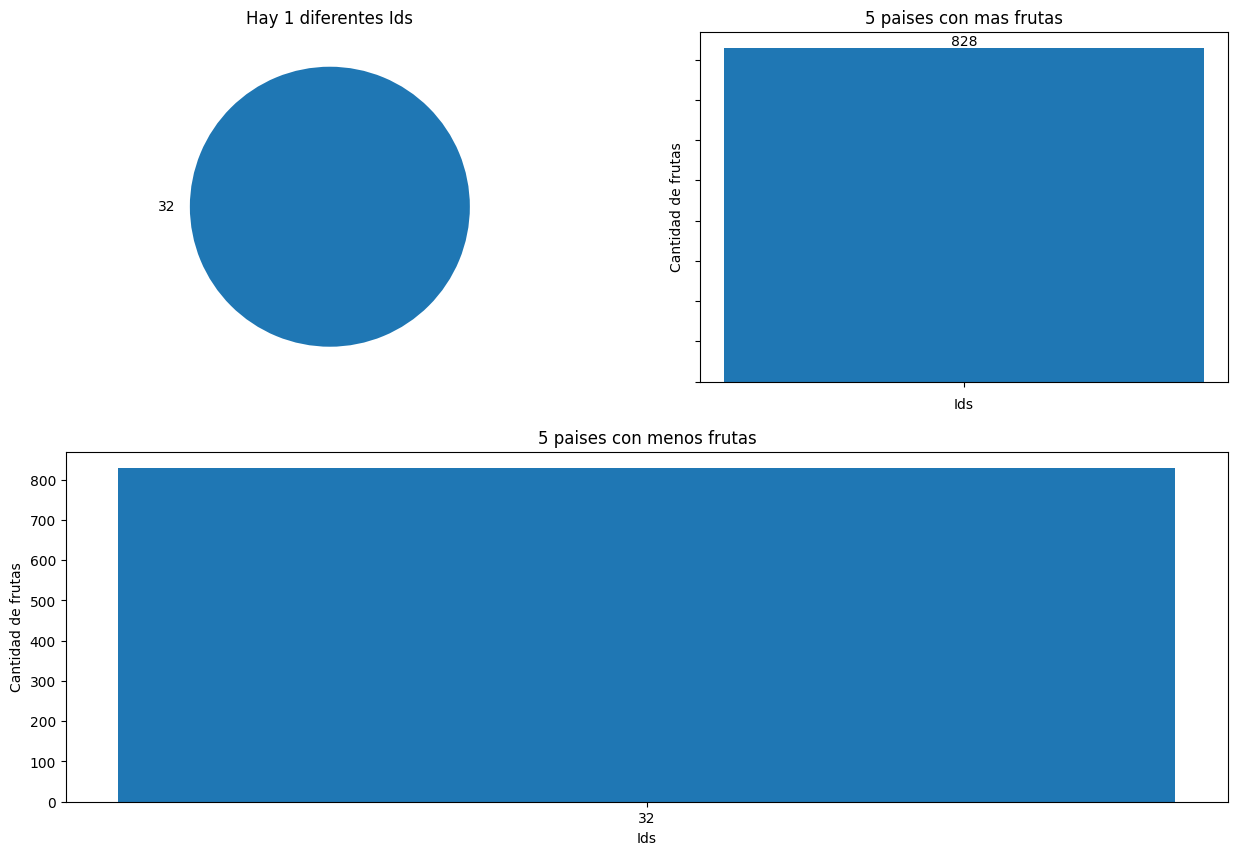

In [57]:
grupo = df.groupby('pais_id')['pais_id']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Ids', '5 paises con mas frutas', '5 paises con menos frutas']
xlabels = ['Ids', 'Ids']
ylabels = ['Cantidad de frutas', 'Cantidad de frutas']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas provienen de un mismo mercado***

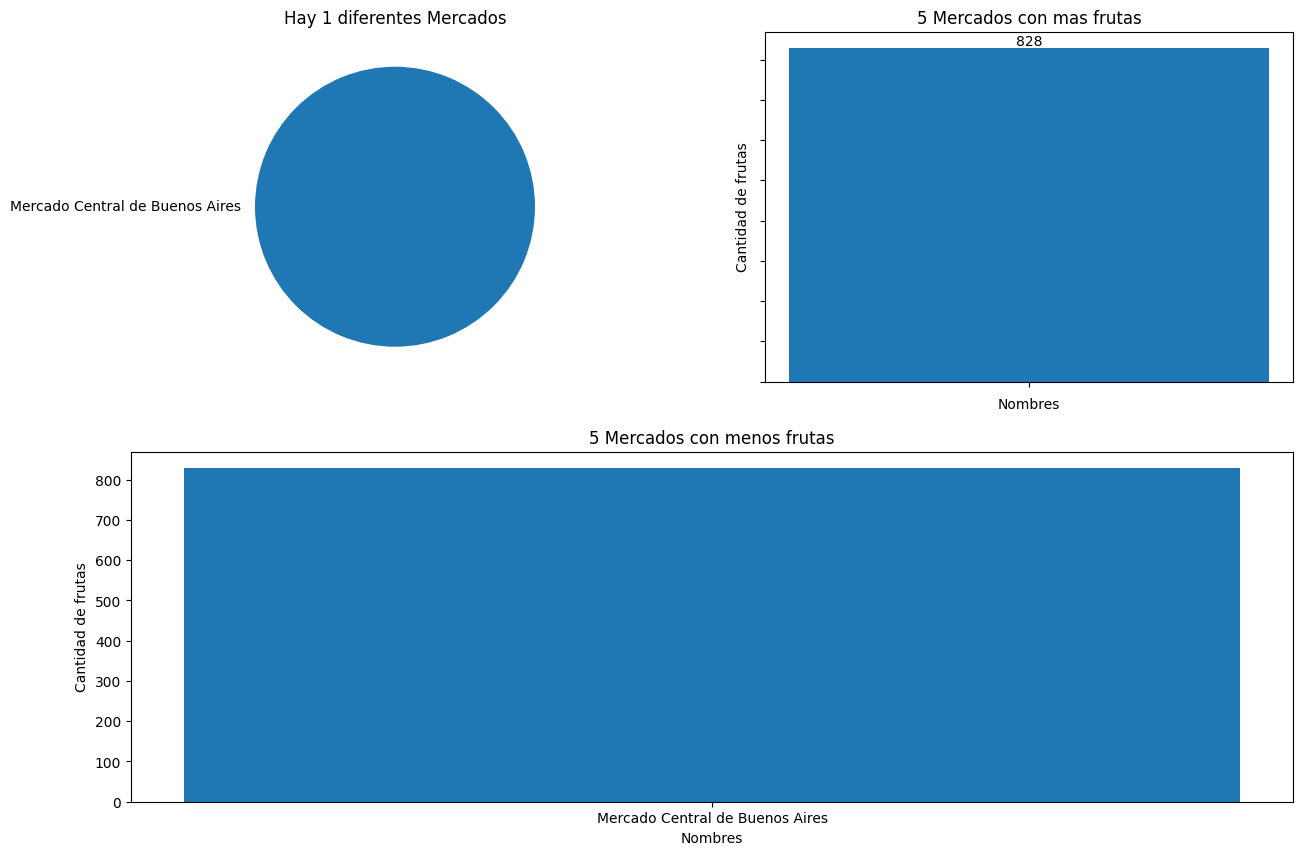

In [58]:
grupo = df.groupby('mercado')['mercado']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Mercados', '5 Mercados con mas frutas', '5 Mercados con menos frutas']
xlabels = ['Nombres', 'Nombres']
ylabels = ['Cantidad de frutas', 'Cantidad de frutas']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas pertenecen a un mismo año***

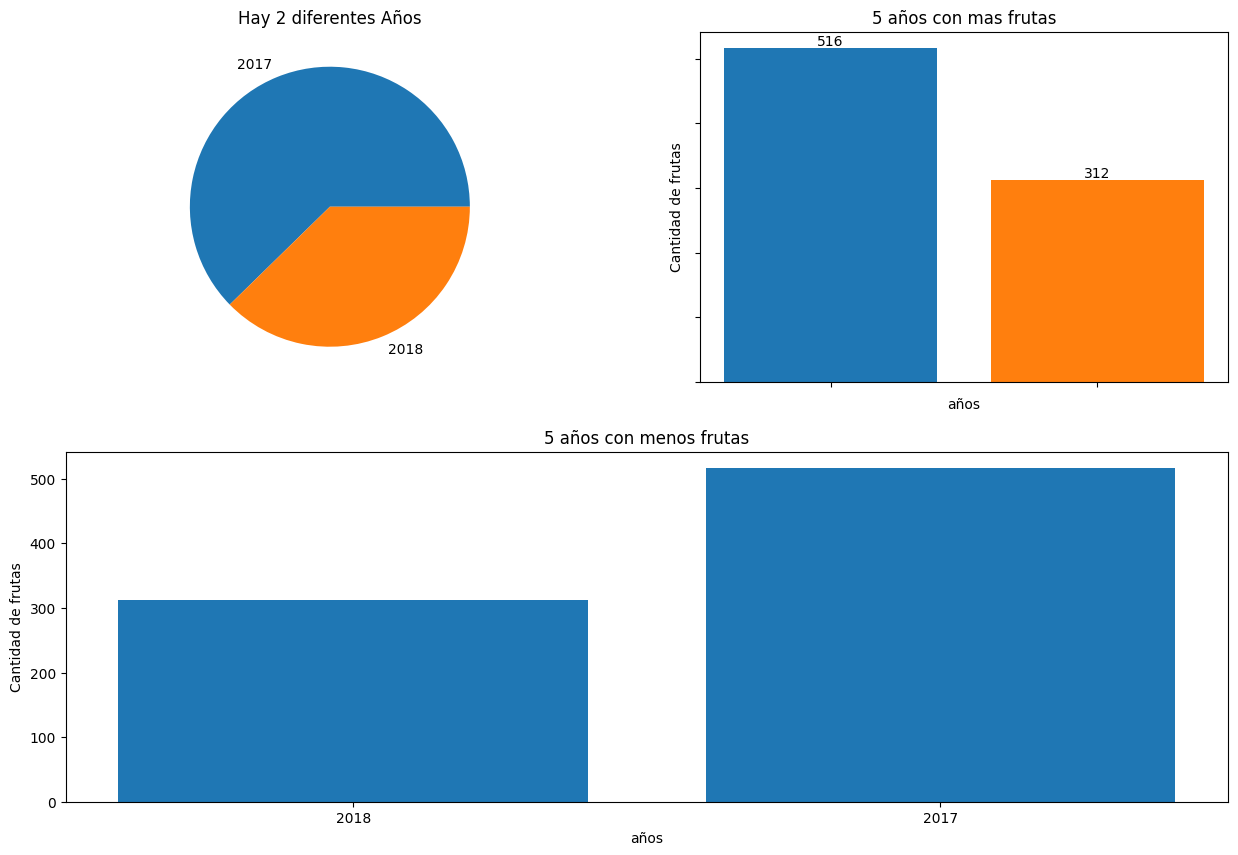

In [59]:
grupo = df.groupby('año')['año']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Años', '5 años con mas frutas', '5 años con menos frutas']
xlabels = ['años', 'años']
ylabels = ['Cantidad de frutas', 'Cantidad de frutas']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas pertenecen a un mismo mes***

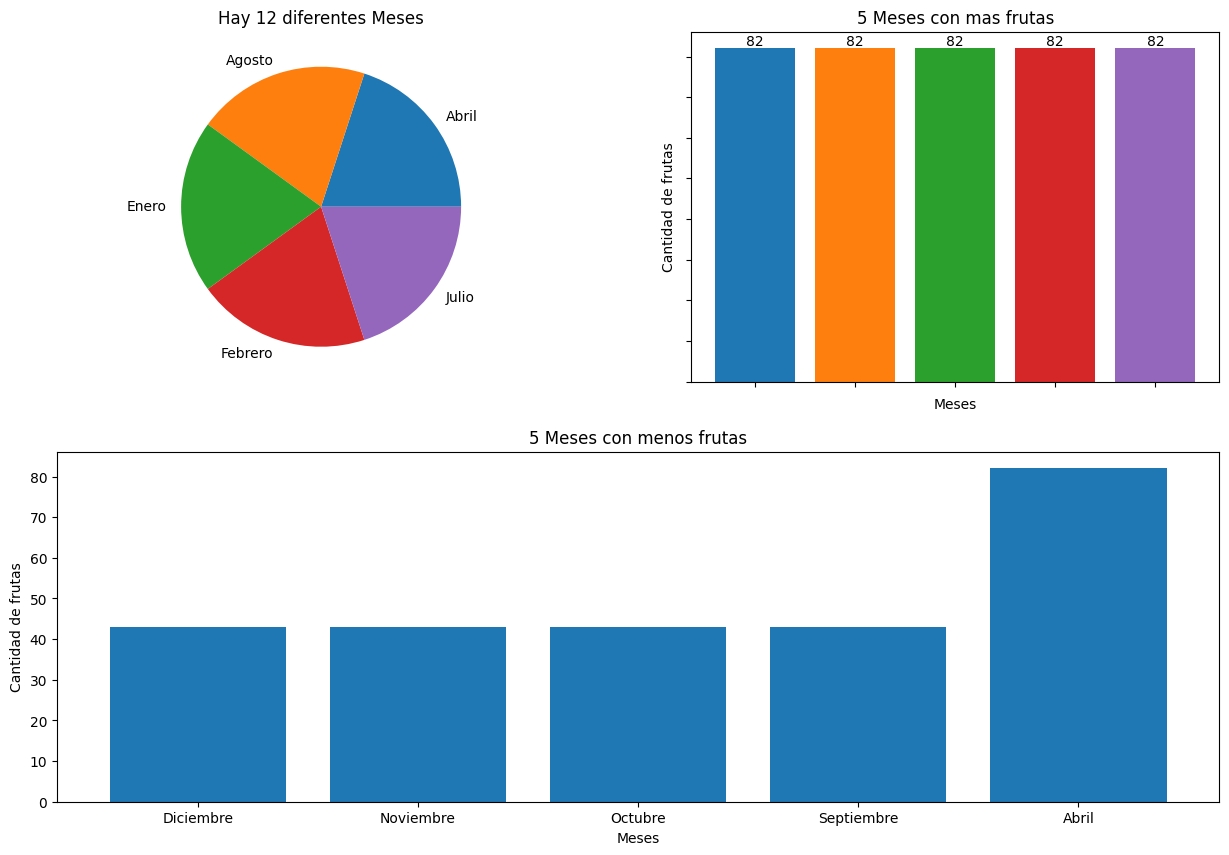

In [60]:
grupo = df.groupby('mes')['mes']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Meses', '5 Meses con mas frutas', '5 Meses con menos frutas']
xlabels = ['Meses', 'Meses']
ylabels = ['Cantidad de frutas', 'Cantidad de frutas']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantos frutas diferentes hay***

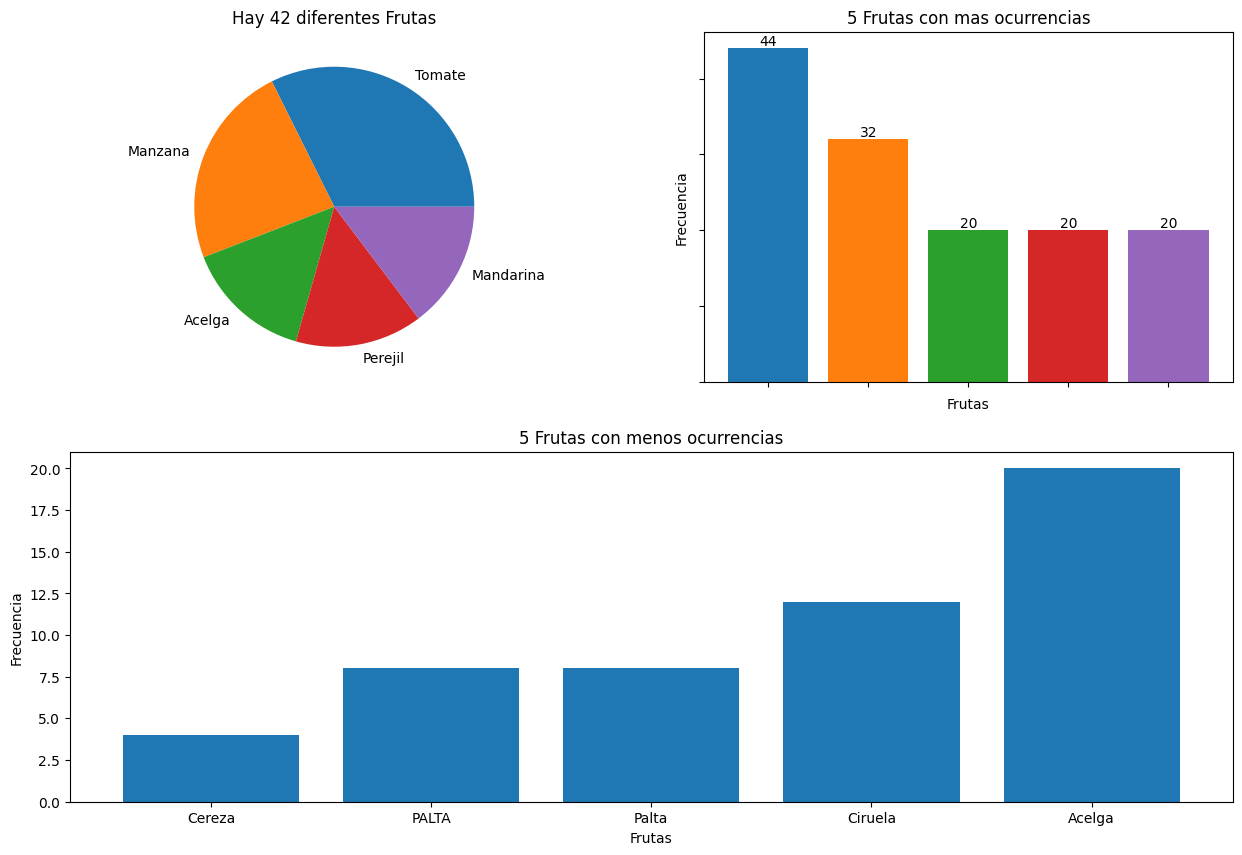

In [61]:
grupo = df.groupby('producto')['producto']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Frutas', '5 Frutas con mas ocurrencias', '5 Frutas con menos ocurrencias']
xlabels = ['Frutas', 'Frutas']
ylabels = ['Frecuencia', 'Frecuencia']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas pertenecen a la misma variedad***

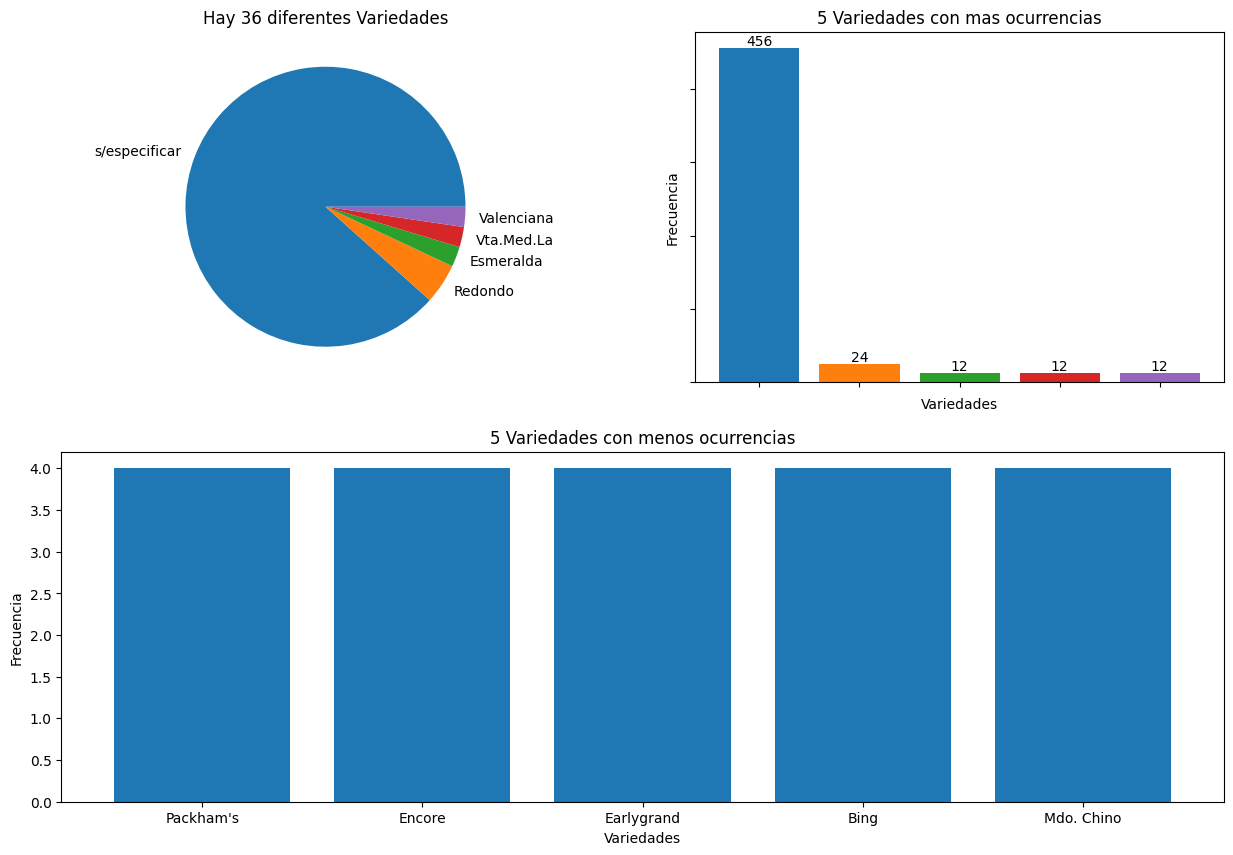

In [62]:
grupo = df.groupby('variedad')['variedad']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Variedades', '5 Variedades con mas ocurrencias', '5 Variedades con menos ocurrencias']
xlabels = ['Variedades', 'Variedades']
ylabels = ['Frecuencia', 'Frecuencia']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas tienen los mismos lugares de origen***

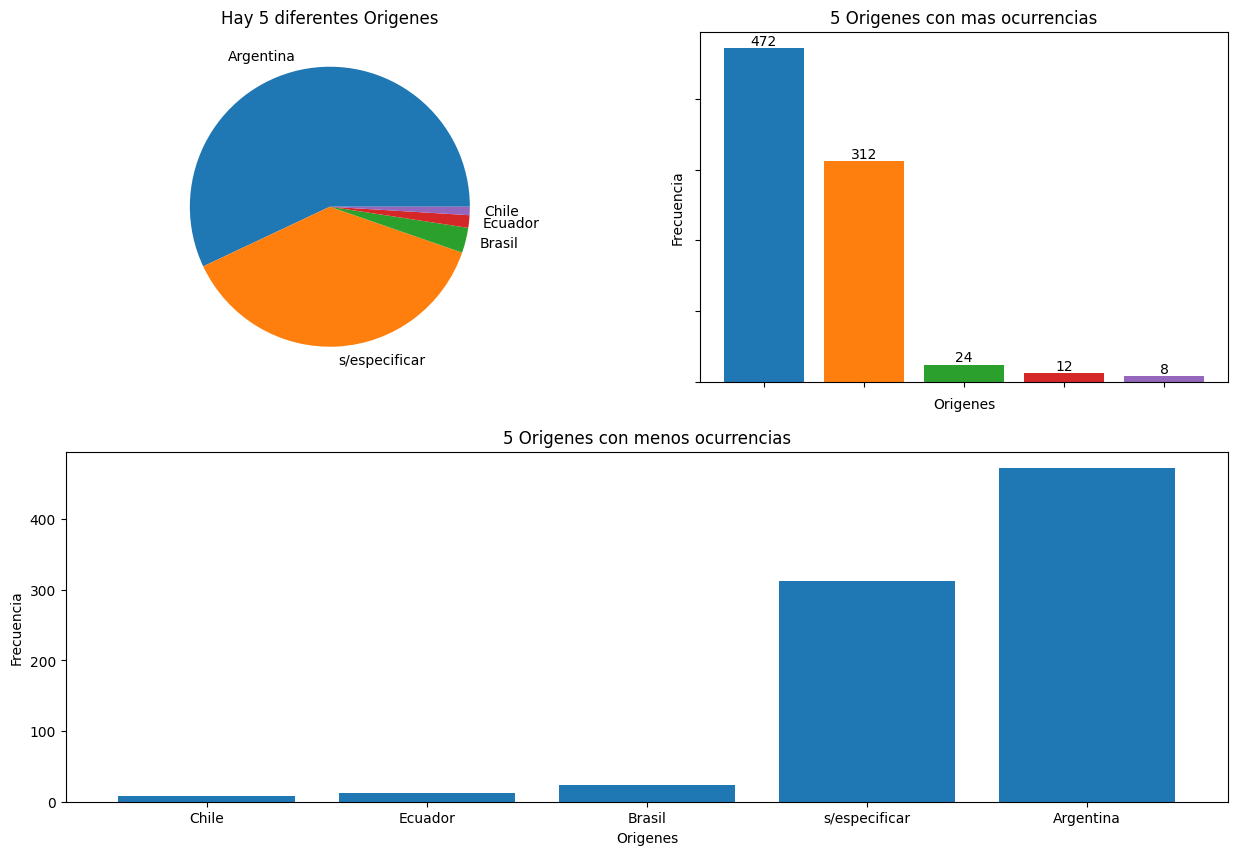

In [63]:
grupo = df.groupby('origen')['origen']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Origenes', '5 Origenes con mas ocurrencias', '5 Origenes con menos ocurrencias']
xlabels = ['Origenes', 'Origenes']
ylabels = ['Frecuencia', 'Frecuencia']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos ahora cuantas frutas tienen un mismo moneda_cod (y por ende la misma moneda)***

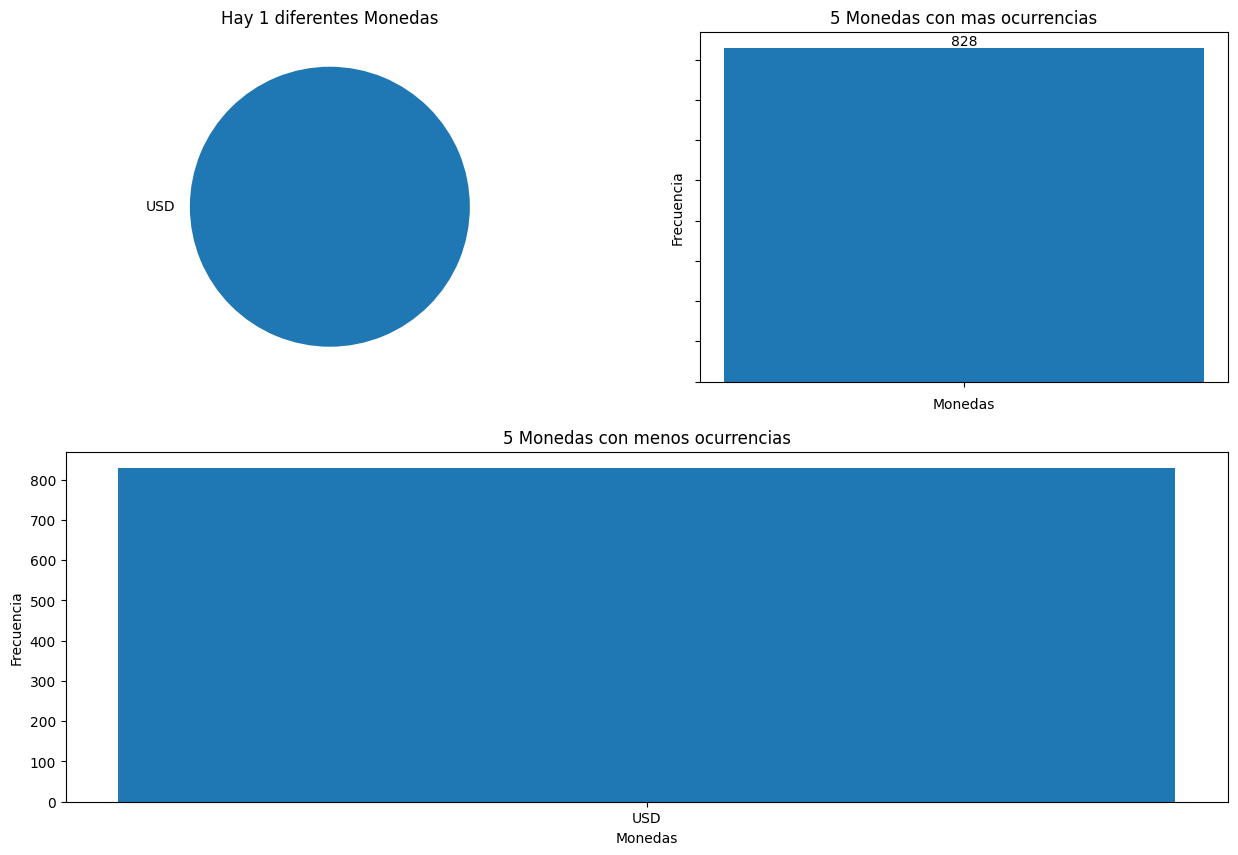

In [64]:
grupo = df.groupby('moneda_cod')['moneda_cod']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Monedas', '5 Monedas con mas ocurrencias', '5 Monedas con menos ocurrencias']
xlabels = ['Monedas', 'Monedas']
ylabels = ['Frecuencia', 'Frecuencia']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos el rango de precios por kg de las frutas y verduras***

Para esto necesitare graficos referidos a las variables cuantitativas continuas

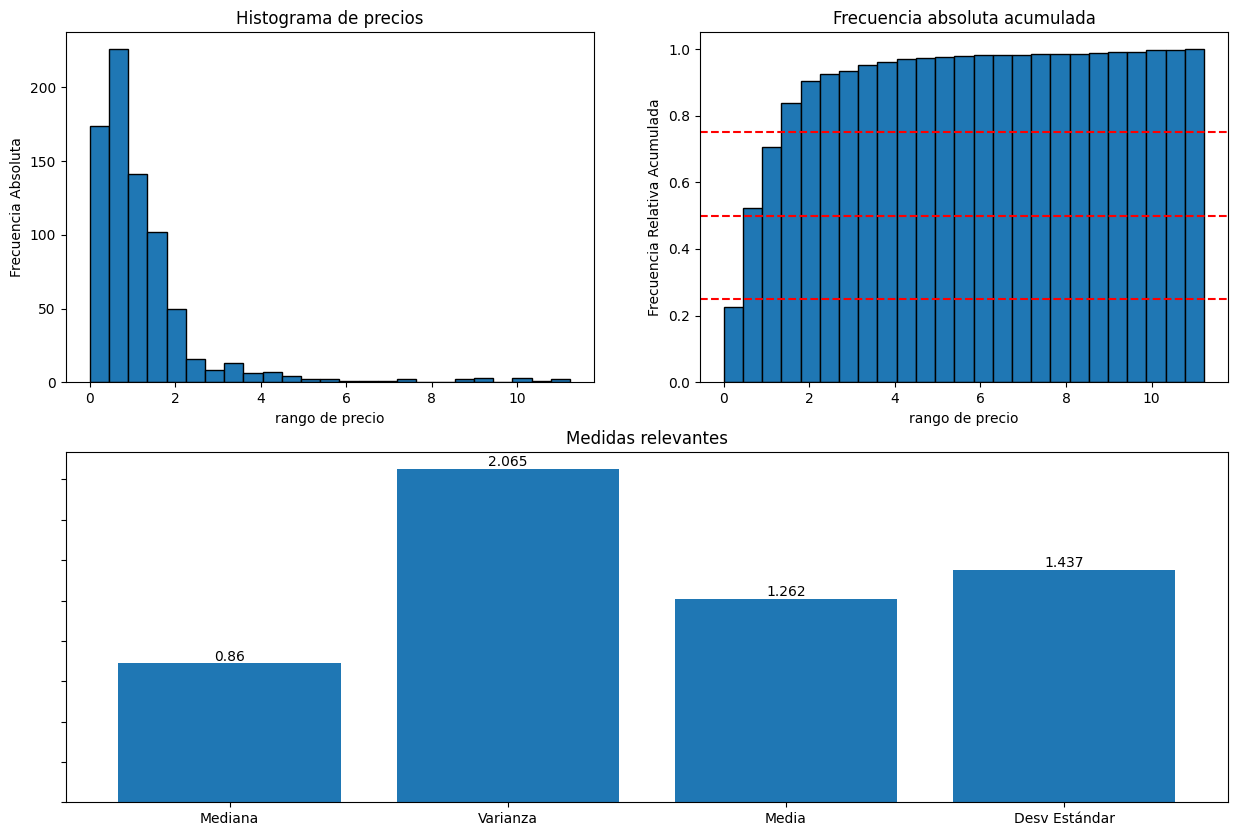

In [65]:
datos = df['precio_usd_kg']
intervalos = 25
titles = ['Histograma de precios', 'Frecuencia absoluta acumulada', 'Medidas relevantes']
xlabels = 'rango de precio'

ylabels = ['Frecuencia Absoluta', 'Frecuencia Relativa Acumulada']

plt.figure(figsize=(15,10))

# Graficamos el histograma de la frecuencia absoluta.
plt.subplot(2, 2, 1)
plt.hist(datos, bins=intervalos, edgecolor='black')
plt.title(titles[0])
plt.xlabel(xlabels)
plt.ylabel(ylabels[0])


# Graficamos la frecuencia relativa acumulada y 3 lineas separando el 25%, 50% y 75% de los datos.
plt.subplot(2, 2, 2)
plt.hist(datos, bins=intervalos, edgecolor='black', density=True, cumulative=True) 
plt.title(titles[1])   
plt.axhline(y=0.25, color='r', linestyle='--') 
plt.axhline(y=0.5, color='r', linestyle='--') 
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel(xlabels)
plt.ylabel(ylabels[1])

#Graficamos las medidas mas relevantes
mediana = datos.median()
varianza = datos.var()
media = datos.mean()
desv_est = datos.std()

x = ['Mediana', 'Varianza', 'Media', 'Desv Estándar']
y = [mediana, varianza, media, desv_est]
ax = plt.subplot(2, 2, (3, 4))
plt.bar(x, y)
plt.title(titles[2])
for i, v in enumerate(y):
    ax.annotate(str(round(v, 3)), xy=(i, v), ha='center', va='bottom')
    ax.set_yticklabels([])

plt.show()

#### ***Conclusion del AED***

1. Solo tenemos futas con pais_id = 32 y por ende pais = Argentina.
2. Todas las frutas provienen del Mercado Central de Bs As.
3. Los datos son de los años 2017-2018.
4. Los meses que encontraremos seran los 12.
5. Hay 42 diferentes frutas, considerando que PALTA y palta son distintas.
6. Hay 36 diferentes variedades.
7. Hay 5 diferentes lugares de origen.
8. Todas las frutas poseen el mismo moneda_cod y por ende la misma moneda.
9. El rango de precios es (0; 11.23] dolares por kg, entre 50%-75% frutas y verduras vale menos de 2 dolares. Y esta columna contiene valores nulos.


### ***3- Aplicar PROCESO DE LIMPIEZA***

***Dadas las conclusiones anteriores puedo:***
1. Descartar las siguientes columnas:
    * pais_id, pais, mercado, moneda_cod y moneda
2. Limpiar la columna precio_usd_kg, eliminando las filas nulas
3. Trataremos de graficar el boxplot de la columna precio_usd_kg despues de eliminar las filas nulas, para ver si existen valores aislados

In [66]:
# Eliminamos las columnas nombradas
df = df.drop(columns=['pais_id','pais','mercado','moneda_cod','moneda'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   año            828 non-null    int64  
 1   mes            828 non-null    object 
 2   producto       828 non-null    object 
 3   variedad       828 non-null    object 
 4   origen         828 non-null    object 
 5   precio_usd_kg  767 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 38.9+ KB


In [67]:
# Procedemos a limpiar la columna precio_usd_kg
# En este caso vamos primero a contar cuantas filas contienen nulos y dependiendo de eso eliminamos esas filas o las reemplazamos convenientemente
cantidad = df["precio_usd_kg"].isnull().sum()
porcentaje = cantidad / df['precio_usd_kg'].count()
print(f'La cantidad de filas con valores null en la columna precio_usd_kg es: {cantidad}')
print(f'Como dichas filas representan el {format(porcentaje, ".2f")}% aprox. decidimos eliminarlas' )
df = df.dropna()
df.info()

La cantidad de filas con valores null en la columna precio_usd_kg es: 61
Como dichas filas representan el 0.08% aprox. decidimos eliminarlas
<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 827
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   año            767 non-null    int64  
 1   mes            767 non-null    object 
 2   producto       767 non-null    object 
 3   variedad       767 non-null    object 
 4   origen         767 non-null    object 
 5   precio_usd_kg  767 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


Pudimos apreciar que hay 2 productos que representan al mismo, solo que uno esta escrito en mayúscula y otro en minúscula. Para esto lo vamos a reemplazar dentro del dataframe.

In [68]:
df.loc[df['producto']=='PALTA', 'producto'] = 'Palta'
df['producto']

0          Anana
1         Banana
2         Pomelo
3          Limón
4        Manzana
         ...    
823      Repollo
824       Tomate
825    Zanahoria
826    Zapallito
827      Zapallo
Name: producto, Length: 767, dtype: object

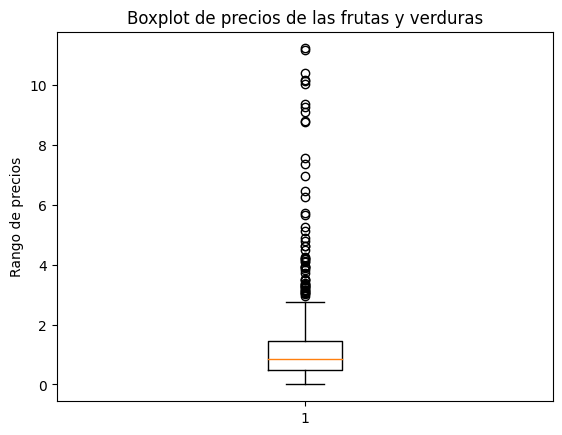

In [69]:
plt.boxplot(df['precio_usd_kg'])
plt.ylabel('Rango de precios')
plt.title('Boxplot de precios de las frutas y verduras')
plt.show()


Vemos que tenemos muchos valores aislados, lo cual implica que debemos asignarles un valor en particular para evitar que se alejen de esta situacion pero que al mismo tiempo no se alejen de la realidad. Quizas en este punto lo mejor sea separar los precios por las distintas frutas, dado que hay frutas que son en promedio mas baratas y otras por lo contrario son en promedio mas caras.
Primero definimos una funcion para crear boxplots dado un determinado df

In [70]:
def crea_muestra_boxplot(sub_df, fruta):
    plt.figure(figsize=(2,3))
    plt.boxplot(sub_df['precio_usd_kg'])
    plt.ylabel(f'Rango de precios de {fruta}')
    plt.title(f'Boxplot de precios de {fruta}')
    plt.show()

def crea_muestra_boxplot_2(frutas):
    posicion = 1
    plt.figure(figsize=(15,30))
    for f in frutas:
        df_aux = df.loc[df['producto'] == f]
        plt.subplot(int(len(frutas)/3) + 1,3,posicion)
        plt.title(f)
        plt.boxplot(df_aux['precio_usd_kg'])
        posicion += 1
    plt.show()


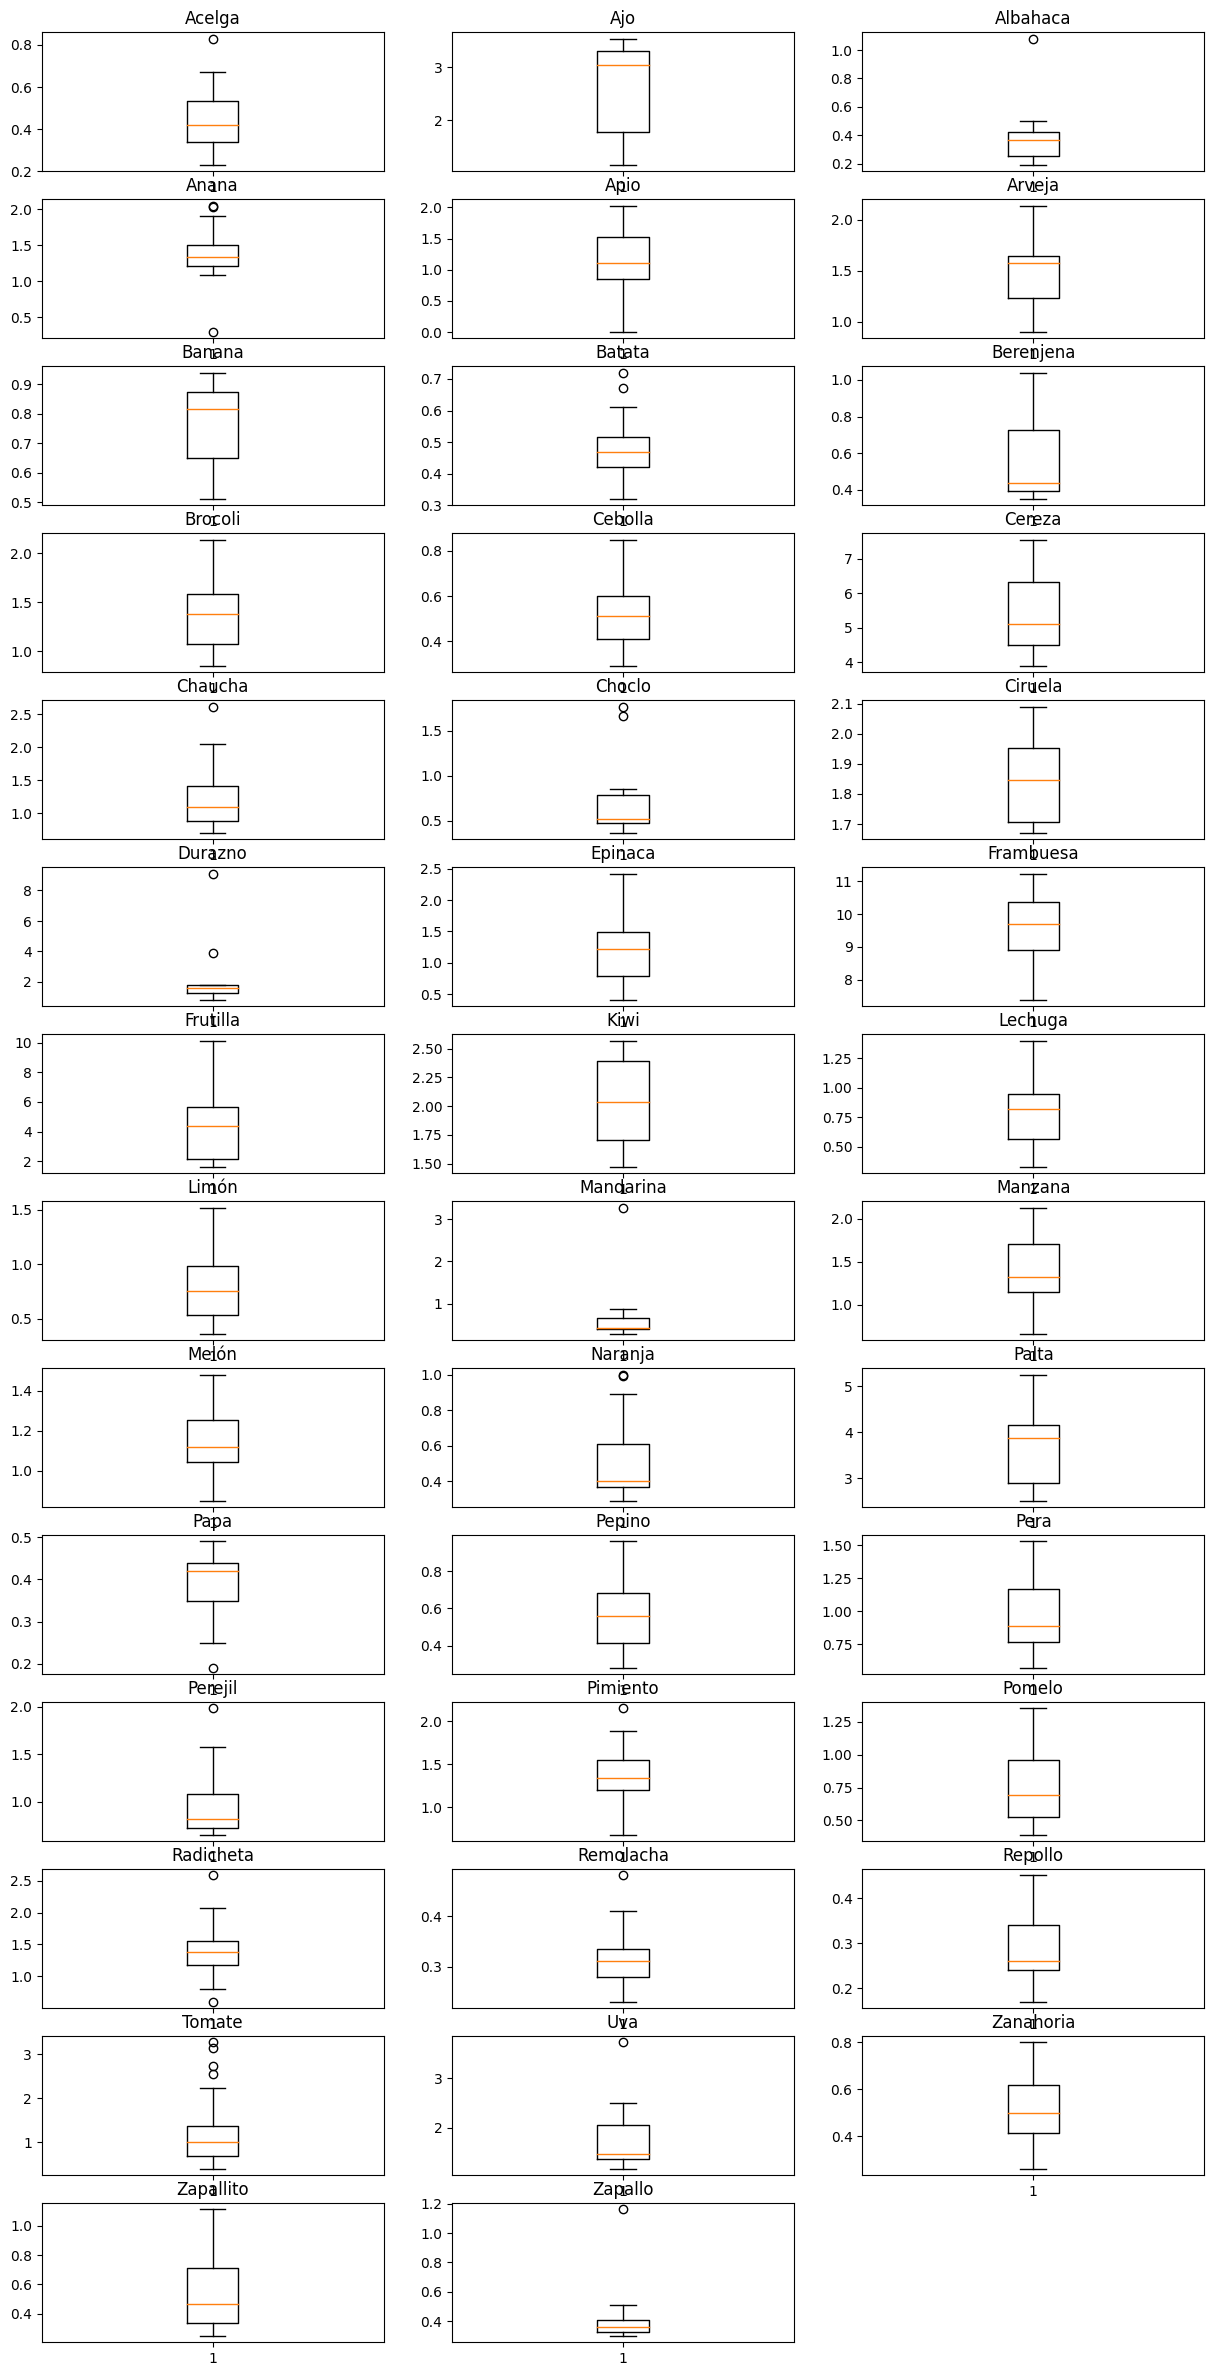

In [71]:
grupo_frutas = df.groupby('producto').groups
frutas = []
for f in grupo_frutas:
    frutas.append(f)
#     crea_muestra_boxplot(df.loc[df['producto'] == f], f)
crea_muestra_boxplot_2(frutas)

Los valores aislados como suponiamos no son tantos, pero los hay en varios productos.

Vamos a igualarlos al xmax o xmin segun corresponda a cada producto.

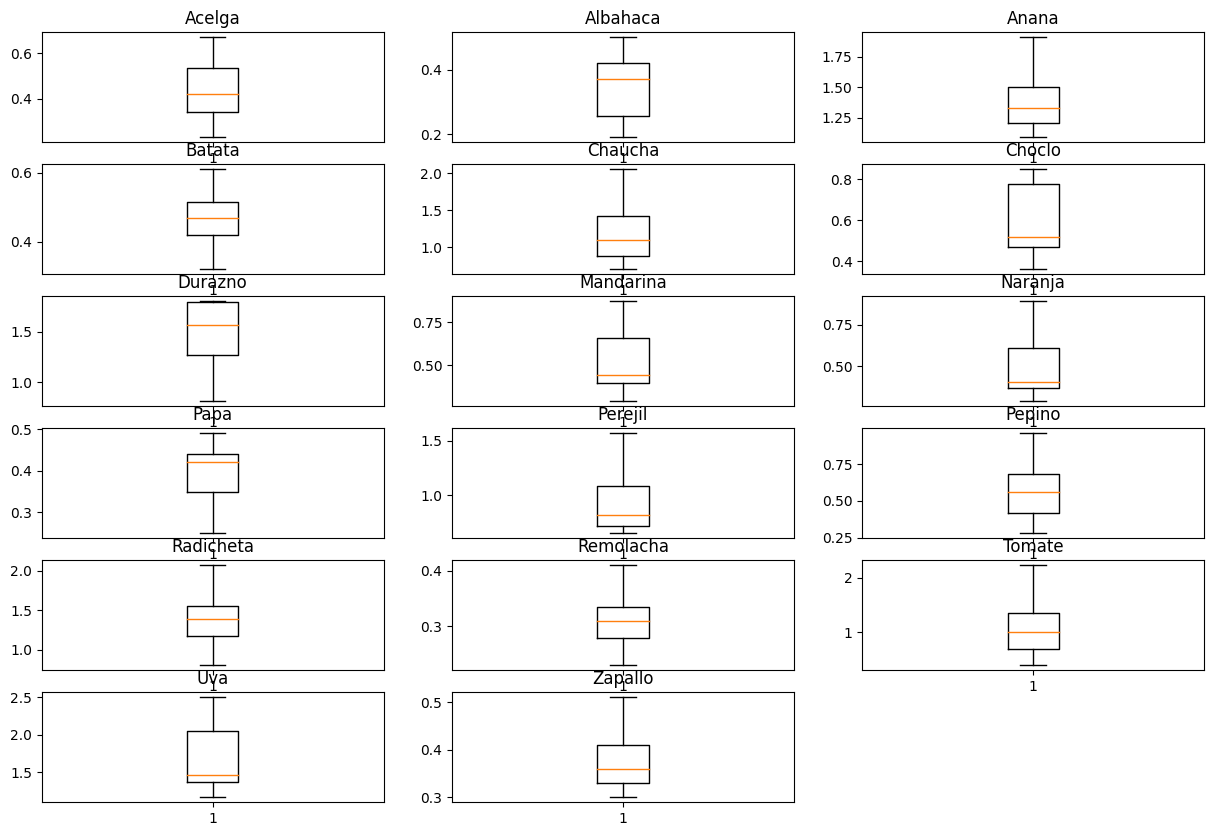

In [72]:
from matplotlib.cbook import boxplot_stats

frutas_valores_aislados = [
    'Acelga',
    'Albahaca',
    'Anana',
    'Batata',
    'Chaucha',
    'Choclo',
    'Durazno',
    'Mandarina',
    'Naranja',
    'Papa',
    'Perejil',
    'Pepino',
    'Radicheta',
    'Remolacha',
    'Tomate',
    'Uva',
    'Zapallo'
]

for f in frutas_valores_aislados:
    df_aux = df.loc[df['producto'] == f]
    q1 = df_aux['precio_usd_kg'].quantile(0.25)
    q3 = df_aux['precio_usd_kg'].quantile(0.75)
    riq = q3 - q1
    franja_inferior = q1 - 1.5 * riq
    franja_superior = q3 + 1.5 * riq
    df.loc[(df['precio_usd_kg']<franja_inferior) & (df['producto'] == f), 'precio_usd_kg'] =  boxplot_stats(df_aux['precio_usd_kg'])[0]['whislo']
    df.loc[(df['precio_usd_kg']>franja_superior) & (df['producto'] == f), 'precio_usd_kg'] =  boxplot_stats(df_aux['precio_usd_kg'])[0]['whishi']

posicion = 1
plt.figure(figsize=(15,10))
for f in frutas_valores_aislados:
    df_aux = df.loc[df['producto'] == f]
    plt.subplot(6,3,posicion)
    plt.title(f)
    plt.boxplot(df_aux['precio_usd_kg'])
    posicion += 1
plt.show()

### ***4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.***

Procederemos a crear un modelo que realice una regresion lineal, pero para esto necesitamos 2 columnas que se correlacionen y que estas columnas deben ser numericas.

Mi idea es dado el nombre de una fruta o verdura, poder predecir el precio. El primer problema es que la columna nombre no es numerica, el segundo es que puedo convertirla a numerica pero debo guardar esa informacion para poder saber a que nombre corresponde que numero.

In [73]:
# Asignaremos un numero a cada  fruta o verdura, almacenando un diccionario para que a la hora de predecir
# el usuario ingrese un texto y nosotros sepamos a que numero representa 
nombre_a_numero = dict(zip(df['producto'], pd.factorize(df['producto'])[0]))
df['producto'] = pd.factorize(df['producto'])[0]

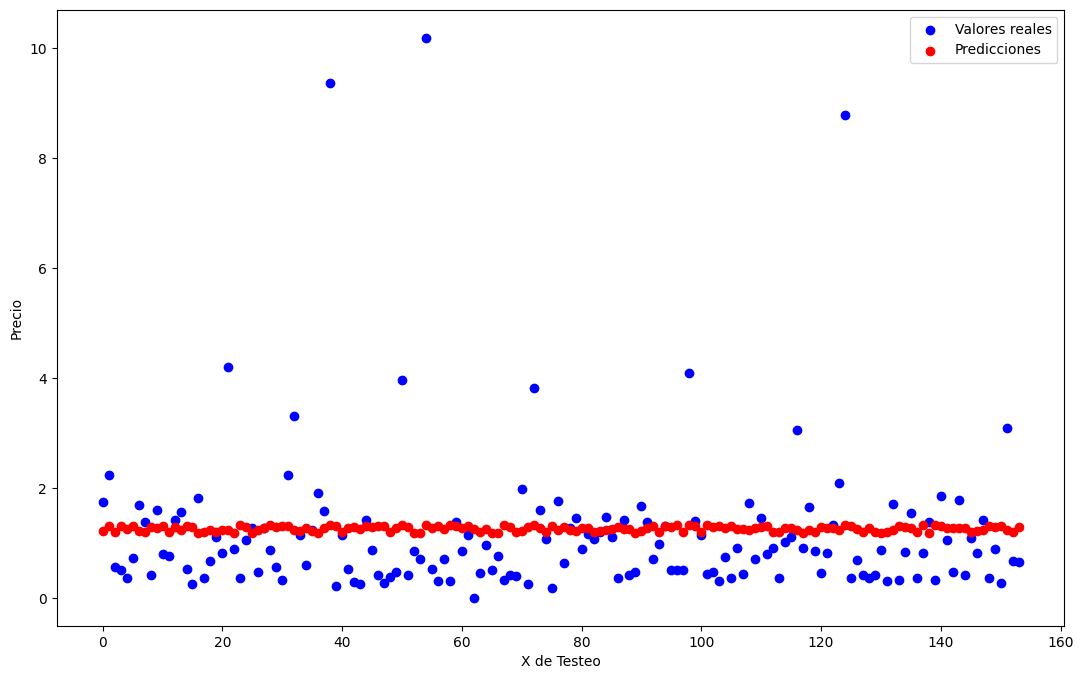

In [74]:
# Importamos las librerias para crear al modelo y para preparar las variables de entrenamiento y testeo 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definimos nuestro modelo de regresion lineal
modelo = LinearRegression()

# Preparamos las variables redimensionandolas y separandolas
X = np.array(df['producto']).reshape(-1,1)
y = np.array(df['precio_usd_kg']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos al modelo
modelo.fit(X_train, y_train)

# Predecimos 
y_pred = modelo.predict(X_test)


plt.figure(figsize=(13, 8))
plt.scatter(range(len(y_test)), y_test, color='b', label='Valores reales')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicciones')
plt.xlabel('X de Testeo')
plt.ylabel('Precio')
plt.legend()
plt.show()

### ***5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.***

In [75]:
# Usamos 2 metricas

# MSE, dado que nos arroja un error resaltando las diferencias mas grandes. Esto porque hay ocasiones en la vida real
# donde los precios se elevan o disminuyen significativamente. Por ende podria ser una buena metrica para indicar 
# el error mas alto que cometio al predecir 
mse = mean_squared_error(y_test, y_pred)

# MAE, Con dicho error podremos conocer un error menos sujeto a las variaciones antes mencionadas pero al mismo tiempo 
# podremos saber un promedio de los diferentes errores. 
mae = mean_absolute_error(y_test, y_pred)



print(f""" En nuestro caso los valores de ambas metricas son:
      mse = {format(mse, '.2f')}
      mae = {format(mae, '.2f')}""")

 En nuestro caso los valores de ambas metricas son:
      mse = 1.94
      mae = 0.79


### ***6- Sacar una conclusión en función de los resultados, errores, y predicciones.***

#### Conclusion
1. Cabe destacar que el modelo no puede adaptarse a las variaciones, podemos observarlo en la grafica.
2. Los errores del tipo porcentual son mas "reales" y por ende erraremos en la predicción del precio en aprox $2 y al ser dolares, eso es errar por mucho.
3. Quizas si tenemos mas datos de años posteriores al 2017 y 2018 podriamos agregar información y por ende precisión
4. El modelo no es muy adecuado para este tipo de situación, dada la fluctuación de los precios y la dependencia de éstos hacia caracteristicas como variedad ó época

### ***7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.***


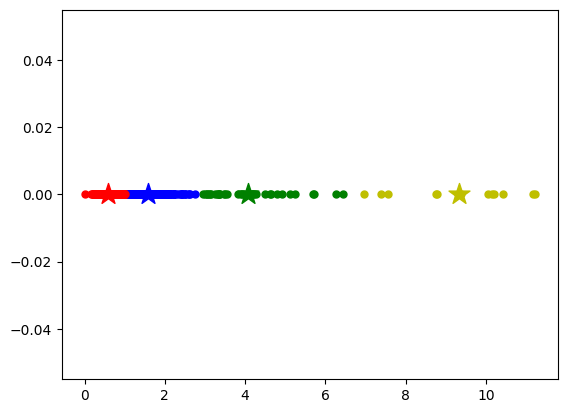

In [109]:
# Importo kmeans
from sklearn.cluster import KMeans

# Determino que usaremos la columna precio como referencia de a que grupo pertenece. La idea seria poder observar si 
# es un producto muy caro, caro o moderado, barato. 
X = np.array(df['precio_usd_kg']).reshape(-1,1)

# Aplicamos el algoritmo K-means con k=4
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)

# Obtenemos los centroides y las etiquetas de cada punto
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizamos los resultados obtenidos
colors = ['r', 'g', 'b', 'y']
# Primero los puntos
for i in range(len(X)):
    plt.scatter(X[i][0], 0, s=25, c=colors[labels[i]])

# Luego los centroides
for i in range(len(centroids)):
    plt.scatter(centroids[i][0], 0, marker='*', s=250, c=colors[i])

plt.show()

In [110]:
# Procedemos a crear la columna y almacenar la informacion obtenida
df['grupo_precio'] = kmeans.labels_
df.head()

,año,mes,producto,variedad,origen,precio_usd_kg,grupo_precio
0,2017,Enero,0,Perola,Brasil,1.22,2
1,2017,Enero,1,Cavdich,Ecuador,0.53,0
2,2017,Enero,2,Star Ruby,Argentina,0.86,0
3,2017,Enero,3,Eureka,Argentina,1.52,2
4,2017,Enero,4,Granny Smith,Argentina,1.84,2


### ***8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.***

#### ***Conclusiones finales***

¿Como podria obtener mejores datos del dataset?*
* **Podriamos extenderlo**, agregandole informacion real que parta desde el año 2019 hasta lo mas actual posible (podria ser 2019, previo a la pandemia).
* **Podriamos agregar columnas al analisis**, Dado que hablamos de precios y como se menciono con anterioridad, el precio depende de muchos factores como lo son la epoca del año, la variedad del producto, el lugar en donde se vende o de donde provse compra dicho producto.
* **Creando un modelo adecuado**, Lo nombremos anteriormente también, dada la fluctuación de los precios y la dependencia de tantos factores quizas no sea lo mejor la regresion lineal si no una especie de modelo que utilice mas de una variable para predecir y que pueda fluctuar de acuerdo a dichos factores.